# Neural Networks Library

My idea of programming a library for Neural Networks started in 2021. I've began watching a lot of Youtube-Turorials about Machine Learning and programming in general. My experience since then had been Arduino, HTML/CSS/JS, LEGO-Mindstorms and Scratch, so to say the obvious, i was a bloody beginner.

## First Try Outs

In 2021 I got a Laptop from school because we had homeschooling and I started programming on it. I downloaded Python, Arduino and started first designing my first networks in Google-Colab (with tensorflow). Soon I also found a good tutorial to make my own Neural Networks (sentdex) and till then I had already a pretty good understanding of the logic behind a Neural Network, so all that was left was to be able to program it. I had multiple runs where I started this project again. Every time I ended up on a new problem, where often my understanding and motivation was done, but I always got on step further.

## This Project

This year 2022/23 I decided again to build a new version, that finally could optimize a Network efficiently. The first part of the year I took long time to build my mindset and decide what to focus on. In november I started my changing my daily mindset bit by bit, till in december I got to the decision to make less excuses and let what I had prepared in my head outside in my life. I changed my daily routine drastically and tried to stop instant gratification so I can build powerful habits.
Now in January, school has got back to regularity and my routine took a lot of will power but is still standing. For not falling in a routine where I don't continously conciously improve, I decided it's time to continue on this journey and start a new Neural Network project! 

In [82]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from library import *
from nnfs.datasets import spiral_data, vertical_data
nnfs.init()

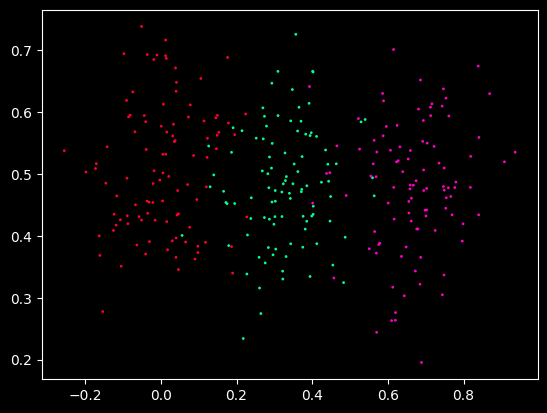

In [83]:
X, y = vertical_data(samples = 100, classes = 3)
plt.style.use('dark_background')
plt.scatter(X[:,0], X[:,1], c=y, s=1, cmap="gist_rainbow")
plt.show()

In [98]:
def predict(NN, intensity = 100, area:list[tuple[int]] = [(0,1),(0,1)]):
    plt.style.use('dark_background')
    x1, x2 = area[0]
    y1,y2 = area[1]
    predX = []
    n=intensity
    for i in range (int(n * (x2-x1))):
        for j in range (int(n * (y2-y1))):
            predX.append(np.array([i/n+x1,j/n+y1]))
    predX = np.array(predX)

    output = NN(predX)
    plt.scatter(predX[:,0], predX[:,1], c=output, s=80, cmap="brg", alpha=0.03)
    X, y = vertical_data(samples = 200, classes = 3)
    plt.scatter(X[:,0], X[:,1], c=y, s=1, cmap="brg")
    plt.show()

In [95]:
myNN = Network(Softmax_and_CategoricalCrossEntropy(), SGD())
myNN.addLayer(Layer_Dense(2, 64, ReLU()))
myNN.addLayer(Layer_Dense(64, 3, None))

print(myNN.run(np.array([3,1])))
print("Loss:\t"+ str(myNN.calcLoss(y)))
print("Accuracy:\t"+ str(myNN.calcAccuracy(y)))

[[ 0.00277333 -0.00265933 -0.0018451 ]]
Loss:	1.0986152
Accuracy:	0.3333333333333333


In [96]:
X, y = vertical_data(samples = 100, classes = 3)


Loss:	1.0988177


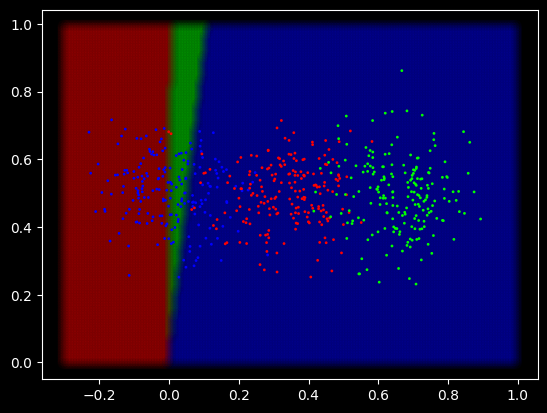

In [102]:
output = myNN(X)
print("Loss:\t"+str(myNN.calcLoss(y)))
predict(myNN,130, area = [(-0.3,1),(0,1)])

epoche: 0, acc: 0.913, loss: 0.700
epoche: 1000, acc: 0.910, loss: 0.697
epoche: 2000, acc: 0.910, loss: 0.695
epoche: 3000, acc: 0.910, loss: 0.692
epoche: 4000, acc: 0.910, loss: 0.690
epoche: 5000, acc: 0.910, loss: 0.688
epoche: 6000, acc: 0.910, loss: 0.686
epoche: 7000, acc: 0.913, loss: 0.686
epoche: 8000, acc: 0.913, loss: 0.684
epoche: 9000, acc: 0.913, loss: 0.683
epoche: 10000, acc: 0.913, loss: 0.682
ACC:	0.9133333333333333
Loss:	0.682


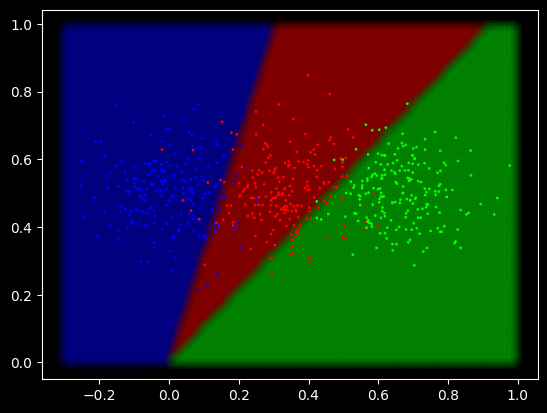

In [104]:
myNN.run(X)
myNN.optimize(X,y,10001, 1000,0.1)
myNN.run(X)
print("ACC:\t"+str(myNN.calcAccuracy(y)))
print(f"Loss:\t{myNN.calcLoss(y):.3f}")

predict(myNN,130, area = [(-0.3,1),(0,1)])

ACC:	0.95
0.13665229


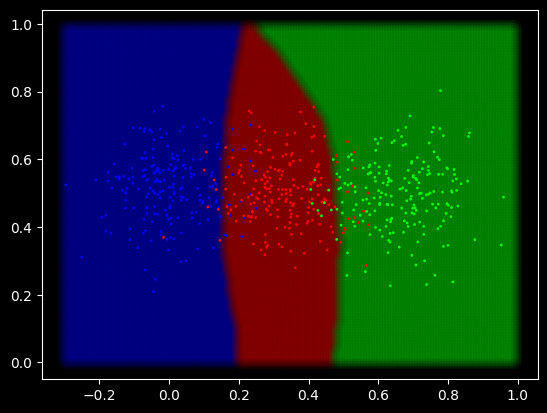

In [113]:
myNN.optimizeRandomly(1000, 0.02, X, y)
output = myNN(X)
print("ACC:\t"+str(myNN.calcAccuracy(y)))
print(myNN.calcLoss(y))

predict(myNN,130, area = [(-0.3,1),(0,1)])